**<h3>Python Script Imports</h3>**

In [26]:
# Python Library imports
import os
import sys
import importlib    
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import FeatureUnion


# Paths
housing_path = r"E:/Future Plans/Post-Graduation-Projects/Hands-on Machine Learning/first-project/datasets/housing.csv"
python_scripts_path = r"E:/Future Plans/Post-Graduation-Projects/Hands-on Machine Learning/first-project/python-scripts"
custom_transformers_path = r"E:/Future Plans/Post-Graduation-Projects/Hands-on Machine Learning/first-project/python-scripts/custom-transformers"

# Path initialization so that Python can see where our script lies.
script_dir = os.path.abspath(python_scripts_path) 
custom_transformers_script_dir = os.path.abspath(custom_transformers_path) 
sys.path.append(script_dir)
sys.path.append(custom_transformers_script_dir)

# Custom Python Script Imports
from sklearn.model_selection import StratifiedShuffleSplit
from test_set_check import test_set_check
from split_train_test_by_id import split_train_test_by_id
from load_housing_data import load_housing_data
from combined_attributes_adder import CombinedAttributesAdder
from data_frame_selector import DataFrameSelector
# Loads housing data
housing = load_housing_data(housing_path)

**<h3>Important</h3>** 
- This is the continuation from the existing notebook: **`I. Prepare data for Machine Learning`** 

**<h3>Step 1 - Prepare the Pipeline for Numerical data</h3>**
**<h5>Definition</h5>** 
- **Pipeline**: A series of steps that apply changes on the data.
- **Numerical Data**: In this case (housing data for 1 district), numerical data/attributes are these columns: 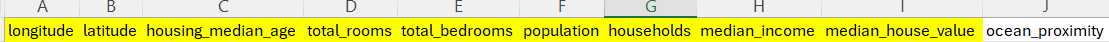
- **`fit()`**: The function that runs the pipeline




In [27]:
# 1. Creates a copy of the housing data, WITHOUT the string column (ocean_proximity)
housing_num = housing.drop("ocean_proximity", axis=1) 
num_pipeline = Pipeline([
('imputer', SimpleImputer(strategy="median")),
('attribs_adder', CombinedAttributesAdder()),
('std_scaler', StandardScaler()),
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [28]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
num_pipeline = Pipeline([
('selector', DataFrameSelector(num_attribs)),
('imputer', SimpleImputer(strategy="median")),
('attribs_adder', CombinedAttributesAdder()),
('std_scaler', StandardScaler()),
])

**<h3>Step 2 - Prepare the Pipeline for Categorical Data</h3>**

**<h5>Definition</h5>**
- Categorical Data: In this case (housing data for 1 district), categorical data is the **`ocean_proximity`** column. 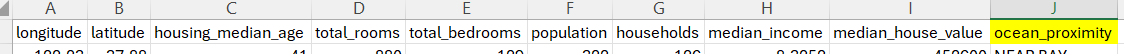


In [29]:
cat_pipeline = Pipeline([
('selector', DataFrameSelector(cat_attribs)),
('cat_encoder', OneHotEncoder(sparse_output=True)),
])

**<h3>Step 3 - Combine Numeric & Categorical Pipelines</h3>**

In [30]:
full_pipeline = FeatureUnion(transformer_list=[
("num_pipeline", num_pipeline),
("cat_pipeline", cat_pipeline),
])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 268320 stored elements and shape (20640, 17)>